## Deskripsi Dataset
<p align="justify">
Dataset prediksi banjir dirancang untuk membantu dalam mengidentifikasi, memantau, dan memprediksi kemungkinan terjadinya banjir di suatu <br> wilayah tertentu. Dataset ini mencakup berbagai faktor independen yang diduga mempengaruhi terjadinya dan tingkat keparahan banjir serta satu <br> faktor dependen yang menunjukkan probabilitas terjadinya banjir. Tujuannya adalah menggunakan faktor-faktor ini untuk membuat model yang dapat <br> memprediksi probabilitas banjir dan membantu dalam upaya mitigasi serta kesiapsiagaan bencana.
</p>

### Feature Independent
<p align="justify">
Dataset ini mencakup serangkaian faktor independen yang komprehensif yang diyakini berkontribusi terhadap terjadinya dan tingkat keparahan banjir. <br> Faktor-faktor ini mencakup dimensi lingkungan, infrastruktur, dan sosial-politik:

    1. MonsoonIntensity: Mengukur intensitas dan jumlah curah hujan selama musim hujan.
    2. Topography Drainage: Menggambarkan kemiringan lanskap dan efisiensi sistem drainase alami.
    3. RiverManagement: Mengevaluasi praktik pengelolaan dan pemeliharaan sistem sungai.
    4. Deforestation: Menunjukkan sejauh mana kehilangan area hutan yang dapat mempengaruhi penyerapan air dan aliran permukaan.
    5. Urbanization: Menilai tingkat pembangunan perkotaan yang mempengaruhi aliran air alami dan meningkatkan aliran permukaan.
    6. ClimateChange: Mengukur efek luas dari perubahan iklim, termasuk perubahan pola cuaca dan kenaikan permukaan laut.
    7. DamsQuality: Mengevaluasi integritas struktural dan manajemen bendungan yang penting untuk pengendalian banjir.
    8. Siltation: Menggambarkan akumulasi sedimen di sungai dan waduk yang mengurangi kapasitas mereka dalam mengelola aliran air.
    9. AgriculturalPractices: Melihat teknik pertanian yang dapat mempengaruhi erosi tanah dan penyerapan air.
    10. Encroachments: Mempertimbangkan pembangunan ilegal atau tidak terencana yang dapat menghalangi saluran air alami.
    11. IneffectiveDisasterPreparedness: Mengevaluasi kesiapsiagaan dan respons sistem manajemen bencana.
    12. DrainageSystems: Menilai desain dan pemeliharaan infrastruktur drainase perkotaan dan pedesaan.
    13. CoastalVulnerability: Menunjukkan area yang rentan terhadap banjir pesisir dan gelombang badai.
    14. Landslides: Mengukur frekuensi dan dampak longsor yang dapat menghalangi sungai dan meningkatkan risiko banjir.
    15. Watersheds: Menggambarkan kesehatan dan pengelolaan daerah aliran sungai yang mempengaruhi aliran dan penyimpanan air.
    16. DeterioratingInfrastructure: Menilai kondisi infrastruktur kritis yang dapat mempengaruhi pengendalian banjir,
    seperti jalan dan jembatan.
    17. PopulationScore: Mempertimbangkan kepadatan dan distribusi populasi yang mempengaruhi evakuasi dan alokasi sumber daya selama banjir.
    18. WetlandLoss: Mengukur kehilangan lahan basah yang merupakan penyangga alami terhadap banjir.
    19. InadequatePlanning: Mengevaluasi efektivitas perencanaan perkotaan dan pedesaan dalam mengurangi risiko banjir.
    20. PoliticalFactors: Melihat pengaruh stabilitas politik dan kebijakan terhadap manajemen dan kesiapsiagaan banjir.
    
### Feature Dependent
Faktor dependen dalam dataset ini adalah:

    FloodProbability: Ini adalah variabel target yang menunjukkan kemungkinan terjadinya banjir di suatu area tertentu. Variabel ini
    didapatkan dari data historis dan model prediksi berdasarkan faktor-faktor independen.
    
### Aplikasi
Dengan menganalisis hubungan antara faktor-faktor independen dan faktor dependen, model prediktif dapat dikembangkan untuk meramalkan <br> probabilitas banjir. Prediksi ini dapat digunakan untuk:

    1. Memberi peringatan kepada otoritas dan individu tentang potensi banjir.
    2. Meningkatkan strategi manajemen dan mitigasi banjir.
    3. Meningkatkan perencanaan perkotaan dan pedesaan untuk mengurangi risiko banjir.
    4. Mengembangkan kebijakan dan tindakan untuk mengatasi faktor-faktor yang berkontribusi terhadap banjir.  
</p>

## Import Module

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Exploratory Data Analysis

In [15]:
# Load Dataset
train = pd.read_csv('Data/train.csv')

In [16]:
# Menampilkan 5 data pertama
train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [17]:
# Informasi Dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

Dataset Flood Prediction terdiri dari 1.117.957 entri dengan 21 kolom (Tidak termasuk 'id'). Setiap kolom dalam dataset ini tidak memiliki nilai null, menunjukkan bahwa data lengkap dan siap untuk analisis lebih lanjut. Untuk semua fitur independen dalam dataset ini memiliki tipe, yaitu int64 (bilangan bulat) sementara untuk fitur dependen (FloodProbability) bertipe float64 (bilangan desimal).

In [19]:
# Analisis Statistik Deskriptif
train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000
Encroachments,1117957.0,4.949230,2.083324,0.000,4.00,5.000,6.00,18.000


1. **Rata-rata Fitur Independen**: Sebagian besar fitur independen seperti MonsoonIntensity, TopographyDrainage, RiverManagement, Deforestation, Urbanization, ClimateChange, DamsQuality, Siltation, AgriculturalPractices, Encroachments, IneffectiveDisasterPreparedness, DrainageSystems, CoastalVulnerability, Landslides, Watersheds, DeterioratingInfrastructure, PopulationScore, WetlandLoss, InadequatePlanning, dan PoliticalFactors memiliki rata-rata nilai sekitar 4.93 hingga 4.96. Ini menunjukkan bahwa secara umum, semua fitur ini memiliki pengaruh yang hampir sama dalam dataset ini.

2. **Variasi Fitur**: Standar deviasi untuk sebagian besar fitur berada di sekitar 2.05 hingga 2.09, menunjukkan bahwa ada variasi yang cukup konsisten di antara nilai-nilai fitur ini dalam dataset.

3. **Nilai Minimum dan Maksimum**: Nilai minimum untuk semua fitur adalah 0, dan nilai maksimum bervariasi, dengan beberapa fitur memiliki nilai maksimum hingga 19. Ini menunjukkan rentang data yang cukup luas, dari tidak ada dampak sama sekali hingga dampak yang sangat tinggi.

4. **Nilai Median dan Kuartil**: Nilai median (50%) untuk sebagian besar fitur adalah 5.00, menunjukkan bahwa sebagian besar data berkumpul di sekitar nilai ini. Kuartil pertama (25%) dan ketiga (75%) untuk semua fitur independen berkisar antara 3.00 hingga 6.00, menunjukkan bahwa 50% dari data untuk setiap faktor berada dalam rentang ini.

5. **FloodProbability**: Fitur dependen, FloodProbability, memiliki rata-rata sekitar 0.504, dengan standar deviasi sekitar 0.051. Nilai ini menunjukkan probabilitas banjir yang umumnya sekitar 50%. Nilai minimum dan maksimum untuk probabilitas banjir adalah 0.285 dan 0.725, menunjukkan rentang probabilitas dari rendah hingga tinggi.

# Visualisasi

## Histogram

In [7]:
fig, ax = plt.subplots(7, 3, figsize=(100, 100))

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.4, hspace=0.6)

i = 0
j = 0

for column in train.columns:
    sns.histplot(x=train[column], bins=min(50, train[column].nunique()), ax=ax[i, j])
    ax[i, j].set_title(column, fontsize=60)
    ax[i, j].tick_params(axis='x', labelsize=50) 
    ax[i, j].tick_params(axis='y', labelsize=50)
    j += 1
    if j > 2:
        i += 1
        j = 0

plt.show()

## boxplots

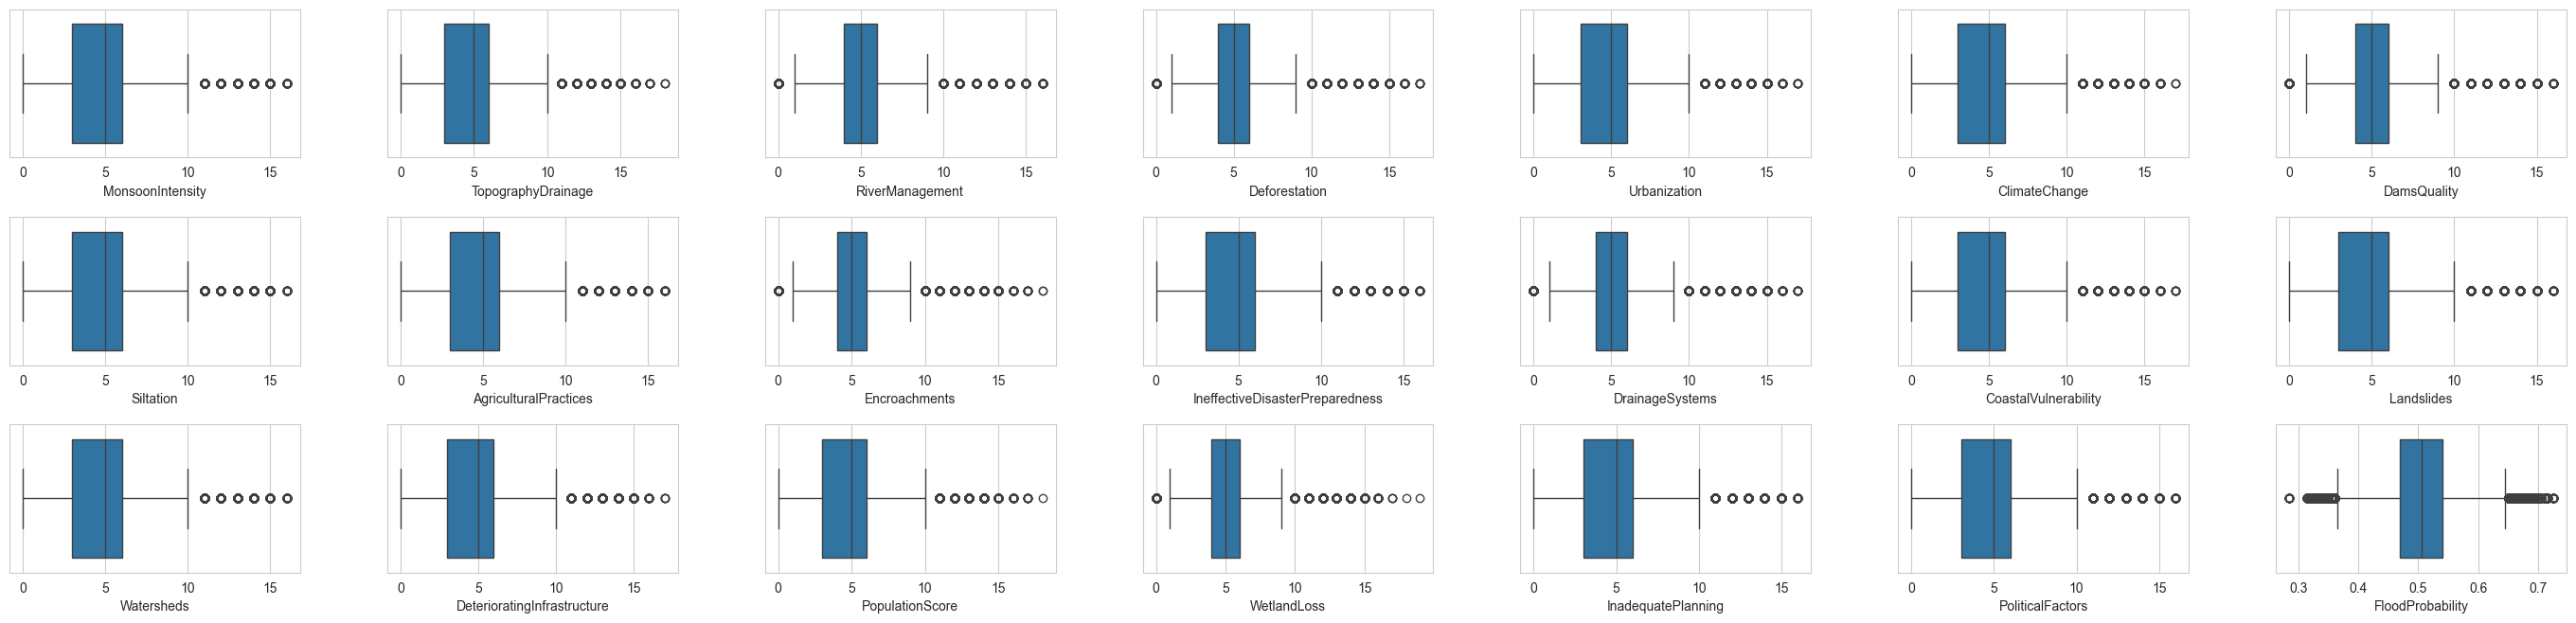

In [28]:
fig , ax = plt.subplots(3,7,figsize = (30,7))
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05, wspace=0.3, hspace=0.4)
i = 0
j = 0
for column in train.columns:
    sns.boxplot(x = train[column] ,ax=ax[i,j])
    j+=1
    if j > 6:
        i+=1
        j = 0

## Correlation

In [43]:
# Analysis Korelasi
train.corr()["FloodProbability"]

MonsoonIntensity                   0.189098
TopographyDrainage                 0.187635
RiverManagement                    0.187131
Deforestation                      0.184001
Urbanization                       0.180861
ClimateChange                      0.184761
DamsQuality                        0.187996
Siltation                          0.186789
AgriculturalPractices              0.183366
Encroachments                      0.178841
IneffectiveDisasterPreparedness    0.183109
DrainageSystems                    0.179305
CoastalVulnerability               0.177774
Landslides                         0.185346
Watersheds                         0.181907
DeterioratingInfrastructure        0.190007
PopulationScore                    0.185890
WetlandLoss                        0.183396
InadequatePlanning                 0.180968
PoliticalFactors                   0.182417
FloodProbability                   1.000000
Name: FloodProbability, dtype: float64

<Axes: >

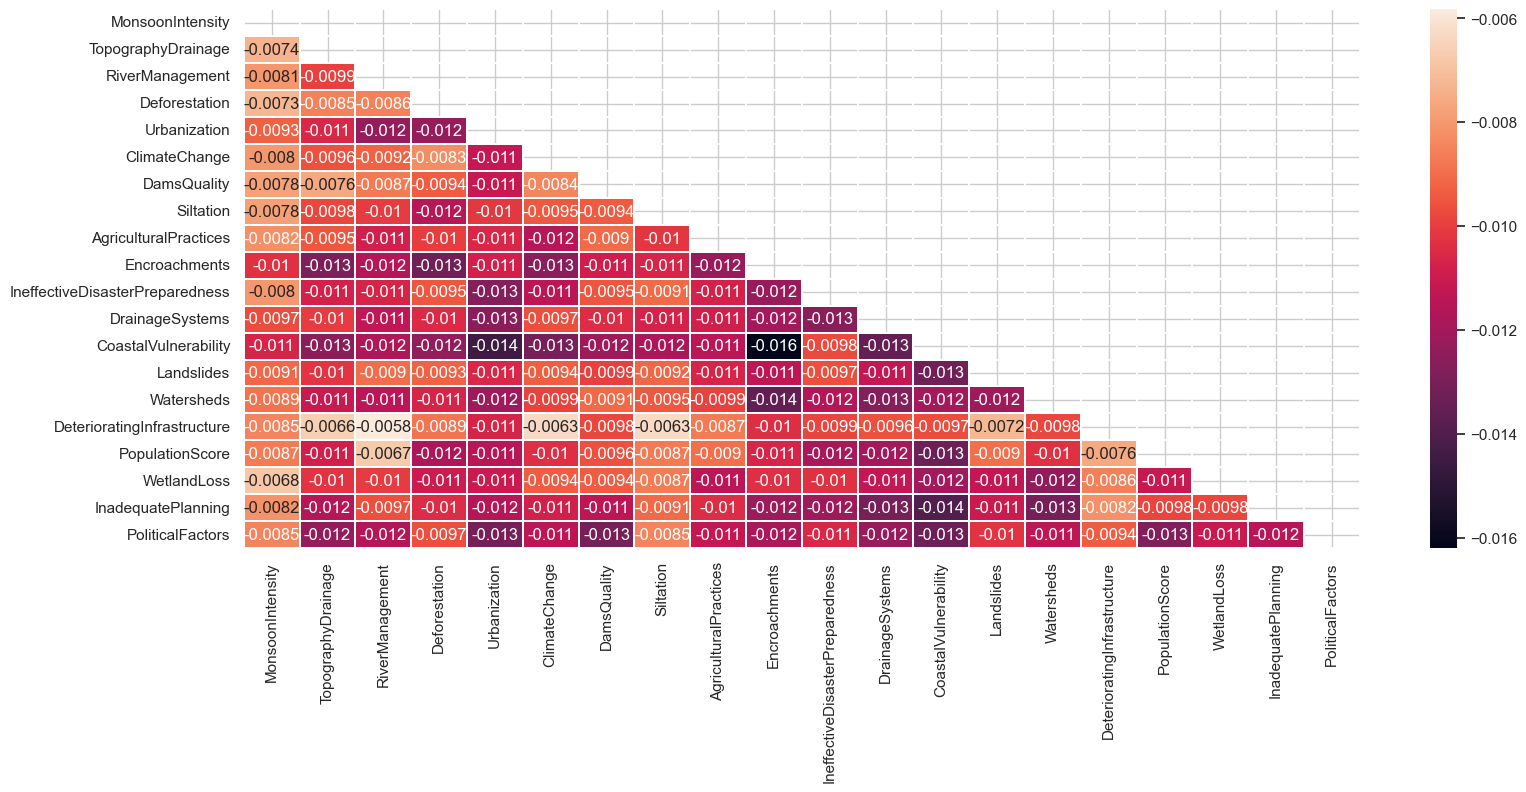

In [44]:
plt.figure(figsize=(18,7))
corr = train.drop('FloodProbability', axis=1).corr()
mask = np.triu(corr)
sns.heatmap(corr, mask = mask,linewidth=0.1 ,annot=True)

Dari hasil korelasi antara faktor-faktor independen dengan FloodProbability (probabilitas banjir), dapat diambil kesimpulan sebagai berikut:

1. **Korelasi Positif yang Moderat**: Sebagian besar fitur independen menunjukkan korelasi positif dengan FloodProbability. Korelasi ini berada dalam rentang 0.177 hingga 0.190, yang menunjukkan hubungan yang moderat antara fitur-fitur tersebut dengan probabilitas terjadinya banjir. Artinya, semakin tinggi nilai fitur independen, semakin tinggi pula probabilitas terjadinya banjir.
2. **Faktor dengan Korelasi Tertinggi**: Fitur DeterioratingInfrastructure memiliki korelasi paling tinggi dengan FloodProbability, yaitu sekitar 0.190. Hal ini menunjukkan bahwa kondisi infrastruktur yang memburuk dapat menjadi indikator penting dalam memprediksi tingkat probabilitas banjir.
3. **Pengaruh Faktor Lingkungan dan Sosial**: Fitur-fitur seperti MonsoonIntensity, TopographyDrainage, RiverManagement, Deforestation, Urbanization, ClimateChange, DamsQuality, Siltation, AgriculturalPractices, Encroachments, IneffectiveDisasterPreparedness, DrainageSystems, CoastalVulnerability, Landslides, Watersheds, PopulationScore, WetlandLoss, InadequatePlanning, dan PoliticalFactors juga memiliki korelasi positif yang signifikan dengan FloodProbability. Hal ini menunjukkan bahwa faktor-faktor lingkungan, sosial, dan infrastruktur memiliki kontribusi yang penting dalam menentukan tingkat risiko banjir.

# Feature Engineering

In [ ]:
train.drop("id", axis=1, inplace=True)

In [20]:
train.duplicated().sum()

0

In [21]:
NON_FEATURES = ['id', 'FloodProbability', 'fold']
BASE_FEATURES = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
                 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
                 'Siltation', 'AgriculturalPractices', 'Encroachments',
                 'IneffectiveDisasterPreparedness', 'DrainageSystems',
                 'CoastalVulnerability', 'Landslides', 'Watersheds',
                 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
                 'InadequatePlanning', 'PoliticalFactors']

def add_features(df):
    df['total'] = df[BASE_FEATURES].sum(axis=1)
    df['amplified_sum'] = (df[BASE_FEATURES] ** 1.5).sum(axis=1)
    df['fskew'] = df[BASE_FEATURES].skew(axis=1)
    df['fkurtosis'] = df[BASE_FEATURES].kurtosis(axis=1)
    df['mean'] = df[BASE_FEATURES].mean(axis=1)
    df['std'] = df[BASE_FEATURES].std(axis=1)
    df['max'] = df[BASE_FEATURES].max(axis=1)
    df['min'] = df[BASE_FEATURES].min(axis=1)
    df['range'] = df['max'] - df['min']
    df['median'] = df[BASE_FEATURES].median(axis=1)
    df['ptp'] = df[BASE_FEATURES].values.ptp(axis=1)
    df['q25'] = df[BASE_FEATURES].quantile(0.25, axis=1)
    df['q75'] = df[BASE_FEATURES].quantile(0.75, axis=1)
    return df

In [22]:
train = add_features(train)
FEATURES = [col for col in train.columns if col not in NON_FEATURES]
train = train[FEATURES + ['FloodProbability']]

X_train = train.drop(['FloodProbability'], axis=1)
y_train = train['FloodProbability']
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Training Model

### Light GBM Regressor

In [32]:
cv = KFold(5, shuffle=True, random_state=0)
cv_splits = cv.split(X_train, y_train)

r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []

model_lgbm = LGBMRegressor(objective='regression', random_state=0)

for train_idx, val_idx in cv_splits:
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    model_lgbm.fit(X_train_fold, y_train_fold)
    y_pred = model_lgbm.predict(X_val_fold)

    r2 = r2_score(y_val_fold, y_pred)
    mae = mean_absolute_error(y_val_fold, y_pred)
    mse = mean_squared_error(y_val_fold, y_pred)
    rmse = np.sqrt(mse)

    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

print(f'Mean R2 score: {np.mean(r2_scores):.5f}')
print(f'Mean MAE score: {np.mean(mae_scores):.5f}')
print(f'Mean MSE score: {np.mean(mse_scores):.5f}')
print(f'Mean RMSE score: {np.mean(rmse_scores):.5f}')

Mean R2 score: 0.86881
Mean MAE score: 0.01440
Mean MSE score: 0.00034
Mean RMSE score: 0.01848


### RandomForest Regressor

In [ ]:
cv = KFold(5, shuffle=True, random_state=0)
cv_splits = cv.split(X_train, y_train)

model_rf = RandomForestRegressor(random_state=0, n_estimators=100)

r2_rf_scores = []
mae_rf_scores = []
mse_rf_scores = []
rmse_rf_scores = []

for train_idx, val_idx in cv_splits:
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    model_rf.fit(X_train_fold, y_train_fold)
    y_pred = model_rf.predict(X_val_fold)

    r2 = r2_score(y_val_fold, y_pred)
    mae = mean_absolute_error(y_val_fold, y_pred)
    mse = mean_squared_error(y_val_fold, y_pred)
    rmse = np.sqrt(mse)

    r2_rf_scores.append(r2)
    mae_rf_scores.append(mae)
    mse_rf_scores.append(mse)
    rmse_rf_scores.append(rmse)

print(f'Mean R2 score: {np.mean(r2_rf_scores):.5f}')
print(f'Mean MAE score: {np.mean(mae_rf_scores):.5f}')
print(f'Mean MSE score: {np.mean(mse_rf_scores):.5f}')
print(f'Mean RMSE score: {np.mean(rmse_rf_scores):.5f}')